This notebook will contain the analysis of the ketu eb results. In its current state it is not yet finished. 

In [1]:
from pipeline import *
%matplotlib inline
from astropy.io import ascii

In [2]:
r = ascii.read("/k2_data/c0_EB")

In [14]:
def plcomp(un, cl):
    for lc in un.model_light_curves:
        pl.xlabel("time [days]")
        pl.ylabel("flux [ppt]")
        pl.plot(lc.time, lc.flux - lc.predict(), 'k.')
        #pl.plot(lc.time,lc.predict(), 'g.')
    for lc in cl.model_light_curves:
        pl.plot(lc.time, lc.flux - lc.predict(), 'r.')
        #pl.plot(lc.time,lc.predict(), 'g.')
    pl.show()
    print(un.response['peaks'])
    print(cl.response['peaks'])

In [6]:
def load(epicid):
    un = analyze(getQuery(epicid,"0"))
    cl = analyze(getEBQuery(epicid,"0"))
    return un, cl

In [21]:
i=0

71
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in OneDSearch
Using cached value in Likelihood
Using cached value in OneDSearch
Using cached value in Likelihood


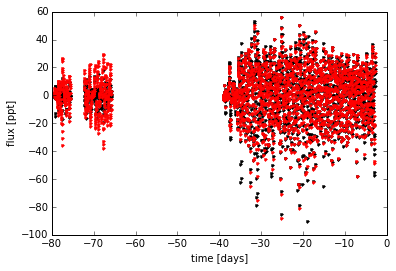

[{'depth_ivar': 1.9782304998855311, 's2n': 28.241581449210866, 'period': 6.7164838930173874, 't0': 5.1710244896461397, 'depth': 20.079392337348711, 'duration': 0.20000000000000001}]
[{'depth_ivar': 0.64588597413847737, 's2n': 30.842784755709072, 'period': 12.75776025009435, 't0': 4.3197792740036363, 'depth': 38.377409499498086, 'duration': 0.10000000000000001}]


In [159]:
print(i)
plcomp(*load(str(r['KIC/EPIC'][i])))
i+=1

In [162]:
u, c = load(str(r['KIC/EPIC'][i]))

Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch


In [167]:
u.response['peaks'][0]['period']

32.395996340347793

In [169]:
u.response['peaks'][0]['s2n']

56.518647050537297

In [240]:
x = []
for name in r['KIC/EPIC']:
    u, c = load(str(name))
    x.append([str(name),u.response['peaks'][0]['period'],u.response['peaks'][0]['s2n'],c.response['peaks'][0]['period'],c.response['peaks'][0]['s2n']])
    

Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwo

In [243]:
x = np.array(x,dtype=np.float)

In [258]:
x[:,2]#s2n 

array([   9.42767945,    8.38535005,    9.57137311,    8.38500163,
         12.11465068,    9.30187059,   50.36467881,   10.53293377,
         20.82890177,   10.17395341,    9.17316646,   36.50908886,
         44.93829662,   29.17469671,   99.13316957,   21.24998716,
         44.99266876,   46.90367613,   23.0292826 ,   38.69519   ,
         40.04465636,   27.57669112,   45.51006961,  129.25200085,
        180.02988226,   33.32677497,   70.10537511,   38.16937419,
         64.98751597,   64.79010252,   76.65495942,   34.44431904,
        233.02155169,   32.16279414,  119.53111223,  211.4768532 ,
        141.50396341,   95.51090761,  176.89150692,  153.34065992,
        123.48318545,  135.98387468,  324.28588028,   35.50321884,
         71.37901755,   89.42551531,   12.49489852,  143.65094699,
         88.67819001,   66.8821088 ,  108.48296171,   41.48927069,
        322.69625789,  137.73255796,   98.02188118,   24.83796958,
         61.86738203,  146.62041896,  104.36739762,  144.74204

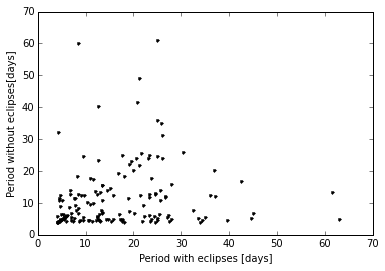

In [255]:
pl.plot(x[:,1],x[:,3], 'k.')
pl.xlabel("Period with eclipses [days]")
pl.ylabel("Period without eclipses[days]")
pl.show()

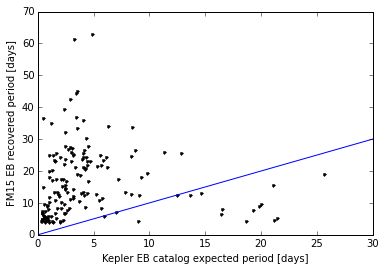

In [252]:
pl.plot(r['period'],x[:,1],'k.')
pl.plot(np.linspace(0,30,10),np.linspace(0,30,10))
pl.xlabel("Kepler EB catalog expected period [days]")
pl.ylabel("FM15 EB recovered period [days]")
pl.show()

In [62]:
def pplot(o):
    period=o.peaks[0]['period']
    t0 = o.peaks[0]['t0']
    for lc in o.model_light_curves:
        mu = lc.predict()
        t = (lc.time - t0 + 0.5 * period) % period - 0.5 * period
        pl.scatter(t, lc.flux-mu,c='red');
    pl.show()

In [154]:
str(r['KIC/EPIC'][i])

'202073438'

In [136]:
r[i]['period']

2.1004239999999998

In [137]:
u,c = load(str(r['KIC/EPIC'][i]))

Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch


In [205]:
u,c = load(str(int(x[0][0])))

Using cached value in IterativeTwoDSearch
Using cached value in IterativeTwoDSearch


Using cached value in OneDSearch
Using cached value in Likelihood


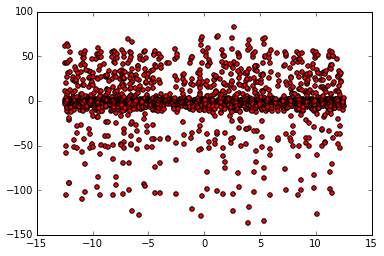

In [206]:
pplot(u)

Using cached value in OneDSearch
Using cached value in Likelihood


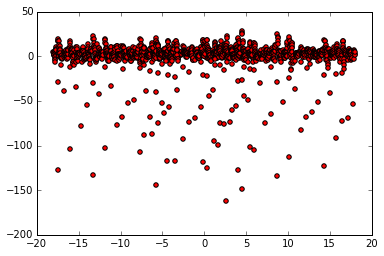

In [207]:
pplot(c)

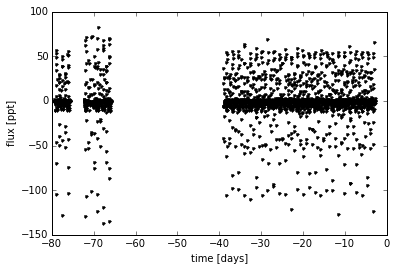

In [208]:
for lc in u.model_light_curves:
    pl.xlabel("time [days]")
    pl.ylabel("flux [ppt]")
    pl.plot(lc.time, lc.flux - lc.predict(), 'k.')
    #pl.plot(lc.time,lc.predict(), 'g.')

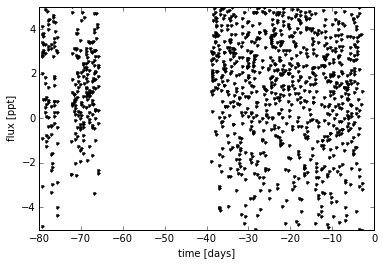

In [209]:
for lc in c.model_light_curves:
    pl.xlabel("time [days]")
    pl.ylabel("flux [ppt]")
    pl.plot(lc.time, lc.flux - lc.predict(), 'k.')
    pl.ylim([-5,5])
    #pl.plot(lc.time,lc.predict(), 'g.')